In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
as_synthesized = pd.read_excel("./UVVis/07252024.xlsx", engine='openpyxl')
water = as_synthesized["G9"].to_numpy()
wavelength = as_synthesized["Wavelength"].to_numpy()

In [3]:
volumes = pd.read_csv("./volumes_repeat_071724.csv")
times = pd.read_csv("./times_repeat_071724.csv")

In [4]:
volumes

,Water,HEPES,Z2M246I,Au,Z2
0,123,54,87,13,3
1,76,54,87,13,50
2,53,54,87,13,73
3,100,54,87,13,26
4,88,54,87,13,38
...,...,...,...,...,...
75,106,54,87,13,20
76,94,54,87,13,32
77,67,54,87,13,59
78,100,54,87,13,26


In [5]:
well_names = as_synthesized.columns[1:-1].values

In [6]:
conc_peptide_A = (0.3*87)/(volumes[["Water", "HEPES", "Z2M246I"]].sum(axis=1).values)
conc_peptide_B = (0.3*volumes["Z2"].values)/(280.0)
ratio_BA = conc_peptide_B/(conc_peptide_A)

In [7]:
def background_correct_normalize(y):
    bkg_y = y-water 
    bkg_y_normalized = (bkg_y-min(bkg_y))/(max(bkg_y) - min(bkg_y))

    return bkg_y_normalized

### Plot data on the composition

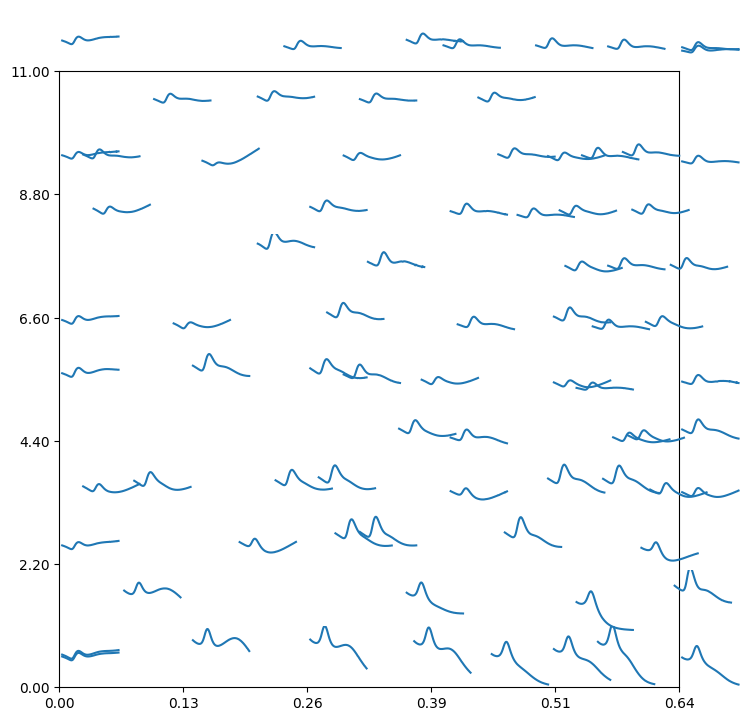

In [8]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

spectra = []
for well_name in well_names:
    y = as_synthesized[well_name].values-water
    spectra.append(y)

spectra = np.asarray(spectra)
comps = np.stack((ratio_BA, times["DT4"].values)).T
bounds = np.asarray([(ratio_BA.min(), ratio_BA.max()), (0.0,11.0)]).T
fig, ax = plt.subplots(figsize=(8,8))
plot_phasemap(bounds, ax, comps, spectra, limits=[0,2.0])

### Find samples with no nanoparticles

In [9]:
for i, well_name in enumerate(well_names):
    time = times["DT4"].values[i]
    ratio = ratio_BA[i]
    if (as_synthesized[well_name].values<0.1).all():
        fig, ax = plt.subplots()
        ax.plot(wavelength, as_synthesized[well_name].values-water, label="Synthesized")
        ax.set_title("[%d, %s] Time : %d , Ratio : %.2f"%(i, well_name, time, ratio))
        ax.legend()
        plt.show()

In [10]:
flags_noNP = [(as_synthesized[well_name].values<0.1).all() for well_name in well_names]
volumes.iloc[flags_noNP, :]

,Water,HEPES,Z2M246I,Au,Z2


In [13]:
spectra.shape, wavelength.shape

((80, 101), (101,))